# Read counts from STAR to count table and DEseq2 object. Normalization and Log transformation to plot some QC

In this notebook the alignment results is condensed to a single dataframe and DESeq2::DESeqDataSet object. 

To run this notebook you need the ReadsPerGene.out.tab files generated on previous task Alignment.

## Read counts from STAR. Convert individual files to a table

ReadsPerGene.out.tab file with 4 columns which correspond to different strandedness options:

column 1: gene ID

column 2: counts for unstranded RNA-seq

column 3: counts for the 1st read strand aligned with RNA (equivalent to htseq-count option -s yes)

column 4: counts for the 2nd read strand aligned with RNA (equivalent to htseq-count option -s reverse)

In [24]:
# set the path where to look for STAR output files
path="/mnt/data/GWES/output/RNASeq/ASTRO_DUMMY/STAR"
input_path="/mnt/data/GWES/input/RNASeq/ASTRO_DUMMY/"

In [5]:
tabfiles <- list.files(path=path, # folder with log files
                           pattern=".ReadsPerGene.out.tab$",
                           recursive = TRUE,
                           full.names = TRUE)
length(tabfiles)

[1] 14

In [6]:
tabfiles

[1] "/mnt/data/GeneExpression/output/RNASeq/S10/S10ReadsPerGene.out.tab"
 [2] "/mnt/data/GeneExpression/output/RNASeq/S27/S27ReadsPerGene.out.tab"
 [3] "/mnt/data/GeneExpression/output/RNASeq/S28/S28ReadsPerGene.out.tab"
 [4] "/mnt/data/GeneExpression/output/RNASeq/S29/S29ReadsPerGene.out.tab"
 [5] "/mnt/data/GeneExpression/output/RNASeq/S30/S30ReadsPerGene.out.tab"
 [6] "/mnt/data/GeneExpression/output/RNASeq/S31/S31ReadsPerGene.out.tab"
 [7] "/mnt/data/GeneExpression/output/RNASeq/S32/S32ReadsPerGene.out.tab"
 [8] "/mnt/data/GeneExpression/output/RNASeq/S33/S33ReadsPerGene.out.tab"
 [9] "/mnt/data/GeneExpression/output/RNASeq/S35/S35ReadsPerGene.out.tab"
[10] "/mnt/data/GeneExpression/output/RNASeq/S36/S36ReadsPerGene.out.tab"
[11] "/mnt/data/GeneExpression/output/RNASeq/S37/S37ReadsPerGene.out.tab"
[12] "/mnt/data/GeneExpression/output/RNASeq/S38/S38ReadsPerGene.out.tab"
[13] "/mnt/data/GeneExpression/output/RNASeq/S39/S39ReadsPerGene.out.tab"
[14] "/mnt/data/GeneExpression/output/RNASeq/S40/S40ReadsPerGene.out.tab"

In [9]:
samplenames=sapply(strsplit(tabfiles,"/"), `[`, 7)
samplenames

[1] "S10" "S27" "S28" "S29" "S30" "S31" "S32" "S33" "S35" "S36" "S37" "S38"
[13] "S39" "S40"

In [17]:
counts.files <- lapply( tabfiles, read.table, skip = 4 ) # do not read first 4 lines
# column V2 has the counts for unstranded RNA-seq
counts <- as.data.frame( sapply( counts.files, function(x) x[ , 2 ] ) ) 
# used column V3 for stranded reads

In [18]:
str(counts.files)

List of 14
 $ :'data.frame':	58735 obs. of  4 variables:
  ..$ V1: chr [1:58735] "ENSG00000223972" "ENSG00000227232" "ENSG00000278267" "ENSG00000243485" ...
  ..$ V2: int [1:58735] 0 1 0 0 0 0 0 0 0 0 ...
  ..$ V3: int [1:58735] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ V4: int [1:58735] 0 1 0 0 0 0 0 0 0 1 ...
 $ :'data.frame':	58735 obs. of  4 variables:
  ..$ V1: chr [1:58735] "ENSG00000223972" "ENSG00000227232" "ENSG00000278267" "ENSG00000243485" ...
  ..$ V2: int [1:58735] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ V3: int [1:58735] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ V4: int [1:58735] 0 0 0 0 0 0 0 0 0 0 ...
 $ :'data.frame':	58735 obs. of  4 variables:
  ..$ V1: chr [1:58735] "ENSG00000223972" "ENSG00000227232" "ENSG00000278267" "ENSG00000243485" ...
  ..$ V2: int [1:58735] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ V3: int [1:58735] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ V4: int [1:58735] 0 0 0 0 0 0 0 0 0 0 ...
 $ :'data.frame':	58735 obs. of  4 variables:
  ..$ V1: chr [1:58735] "ENSG00000223972" "ENSG00000227232" "ENSG00000278

In [19]:
head(counts,n=3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
# extract the sample name from the ReadsPerGene.out.tab file or path.
colnames(counts) <- samplenames
# make gene Id the rownames. geneID is the first column in the log file
row.names(counts) <- counts.files[[1]]$V1

In [21]:
dim(counts)
head(counts)

[1] 58735    14

,S10,S27,S28,S29,S30,S31,S32,S33,S35,S36,S37,S38,S39,S40
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000223972,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000227232,1,0,0,1,0,0,0,0,0,1,0,0,0,0
ENSG00000278267,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000243485,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000284332,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000237613,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Remove genes with 0 counts in all samples

In [22]:
# remove  genes  without  any  counts
counts.filtered <- counts[ rowSums(counts) > 0, ]
dim(counts.filtered)
head(counts.filtered)

[1] 33105    14

,S10,S27,S28,S29,S30,S31,S32,S33,S35,S36,S37,S38,S39,S40
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000227232,1,0,0,1,0,0,0,0,0,1,0,0,0,0
ENSG00000238009,0,0,0,0,0,0,0,0,0,0,0,0,1,0
ENSG00000268903,0,2,0,3,1,1,1,2,0,3,0,1,2,0
ENSG00000269981,0,0,1,2,1,1,0,0,1,0,0,0,0,0
ENSG00000241860,0,0,2,0,1,0,0,0,0,0,0,0,0,2
ENSG00000279457,1,2,1,2,4,3,1,1,4,1,2,5,0,2


In [52]:
write.table(counts.filtered,paste(path,"count_table",sep="/"))

## Read sample info

In [29]:
sampleinfo=read.csv(paste(input_path,"sample_info.txt",sep="/"),sep=" ")
dim(sampleinfo)
head(sampleinfo)

[1] 15  8

,Samplename,ApoE_group,Sample_ID,ApoE_genotype,Sex,Status,RIN,Raw.files
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,S27,ApoE2,E22C6astro1,E2E2,Female,Control,9.1,E22C6astro1_S27_L001_R1_001.fastq.gz/E22C6astro1_S27_L002_R1_001.fastq.gz/E22C6astro1_S27_L003_R1_001.fastq.gz/E22C6astro1_S27_L004_R1_001.fastq.gz
2,S28,ApoE2,E22C6astro2,E2E2,Female,Control,9.2,E22C6astro2_S28_L001_R1_001.fastq.gz/E22C6astro2_S28_L002_R1_001.fastq.gz/E22C6astro2_S28_L003_R1_001.fastq.gz/E22C6astro2_S28_L004_R1_001.fastq.gz
3,S29,ApoE2,E22C6astro3,E2E2,Female,Control,9.3,E22C6astro3_S29_L001_R1_001.fastq.gz/E22C6astro3_S29_L002_R1_001.fastq.gz/E22C6astro3_S29_L003_R1_001.fastq.gz/E22C6astro3_S29_L004_R1_001.fastq.gz
4,S33,ApoE3,E33C2astro1,E3E3,Female,Case,9.3,E33C2astro1_S33_L001_R1_001.fastq.gz/E33C2astro1_S33_L002_R1_001.fastq.gz/E33C2astro1_S33_L003_R1_001.fastq.gz/E33C2astro1_S33_L004_R1_001.fastq.gz
5,S10,ApoE3,E33C2astro2,E3E3,Female,Case,9.3,E33C2astro2_S10_L001_R1_001.fastq.gz/E33C2astro2_S10_L002_R1_001.fastq.gz/E33C2astro2_S10_L003_R1_001.fastq.gz/E33C2astro2_S10_L004_R1_001.fastq.gz
6,S35,ApoE3,E33C2astro3,E3E3,Female,Case,9.1,E33C2astro3_S35_L001_R1_001.fastq.gz/E33C2astro3_S35_L002_R1_001.fastq.gz/E33C2astro3_S35_L003_R1_001.fastq.gz/E33C2astro3_S35_L004_R1_001.fastq.gz


In [30]:
sampleinfo<-sampleinfo[, c(1,2,4,5,6)]
sampleinfo

,Samplename,ApoE_group,ApoE_genotype,Sex,Status
,<chr>,<chr>,<chr>,<chr>,<chr>
1,S27,ApoE2,E2E2,Female,Control
2,S28,ApoE2,E2E2,Female,Control
3,S29,ApoE2,E2E2,Female,Control
4,S33,ApoE3,E3E3,Female,Case
5,S10,ApoE3,E3E3,Female,Case
6,S35,ApoE3,E3E3,Female,Case
7,S30,ApoE4,E3E4,Female,Case
8,S31,ApoE4,E3E4,Male,Case
9,S32,ApoE4,E3E4,Male,Case


**Important:** It is absolutely critical that the columns of the count matrix and the rows of the column data (information about samples) are in the same order. 

In [31]:
# order Samplename column in the same order as columns in count table
sampleinfo<-sampleinfo[match(colnames(counts.filtered), sampleinfo$Samplename),]
head(sampleinfo)

,Samplename,ApoE_group,ApoE_genotype,Sex,Status
,<chr>,<chr>,<chr>,<chr>,<chr>
5,S10,ApoE3,E3E3,Female,Case
1,S27,ApoE2,E2E2,Female,Control
2,S28,ApoE2,E2E2,Female,Control
3,S29,ApoE2,E2E2,Female,Control
7,S30,ApoE4,E3E4,Female,Case
8,S31,ApoE4,E3E4,Male,Case


## DESeq’s specialized data set object

DESeq stores virtually all information associated with your experiment in one specific Robject, called DESeqDataSet. This is, in fact, a specialized object of the class “SummarizedExperiment". This, in turn, is a container where rows (rowRanges()) represent features of interest (e.g. genes, transcripts, exons) and columns represent samples (colData()). The actual count data is stored in the assay() slot.

In [1]:
suppressPackageStartupMessages(library(DESeq2))

ERROR: Error in library(DESeq2): there is no package called 'DESeq2'


In [61]:
# generate  the  DESeqDataSet 
DESeq.ds <- DESeqDataSetFromMatrix(countData = counts.filtered ,
                                    colData = sampleinfo ,
                                    design = ~ ApoE_group)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
"some variables in design formula are characters, converting to factors"


In [69]:
colnames(DESeq.ds) <- colnames(counts.filtered)

In [72]:
head(counts.filtered)
head(assay(DESeq.ds))

,S10,S27,S28,S29,S30,S31,S32,S33,S35,S36,S37,S38,S39,S40
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000227232,1,0,0,1,0,0,0,0,0,1,0,0,0,0
ENSG00000238009,0,0,0,0,0,0,0,0,0,0,0,0,1,0
ENSG00000268903,0,2,0,3,1,1,1,2,0,3,0,1,2,0
ENSG00000269981,0,0,1,2,1,1,0,0,1,0,0,0,0,0
ENSG00000241860,0,0,2,0,1,0,0,0,0,0,0,0,0,2
ENSG00000279457,1,2,1,2,4,3,1,1,4,1,2,5,0,2


,S10,S27,S28,S29,S30,S31,S32,S33,S35,S36,S37,S38,S39,S40
ENSG00000227232,1,0,0,1,0,0,0,0,0,1,0,0,0,0
ENSG00000238009,0,0,0,0,0,0,0,0,0,0,0,0,1,0
ENSG00000268903,0,2,0,3,1,1,1,2,0,3,0,1,2,0
ENSG00000269981,0,0,1,2,1,1,0,0,1,0,0,0,0,0
ENSG00000241860,0,0,2,0,1,0,0,0,0,0,0,0,0,2
ENSG00000279457,1,2,1,2,4,3,1,1,4,1,2,5,0,2


In [73]:
save(DESeq.ds,file=paste(path,"DESeq_object",sep="/"))

# Normalization and log transformation

As a first processing step, we need to estimate the effective library size. This step is sometimes also called normalisation, even  though  there  is  no  relation  to  normality  or  a  normal  distribution.    The  effective  library  size  information  is called  the size  factors vector,  since  the  package  only  needs  to  know  the  relative  library  sizes. 

If  we  divide  each  column  of  the  count  table  by  the  size  factor  for  this  column,  the  count  values  are  brought to  a  common  scale,  making  them  comparable.   When  called  with normalized=TRUE,  the counts accessor  function performs this calculation. 

We normalise and log transform here to inspect the data, but the next step, differential expression analysis, uses the DESeqDataSet object, not the normalised one. 

DESeq’s default method to normalize read counts to account for differences in sequencing depths is implemented in estimateSizeFactors.

In [39]:
# calculate  the  size  factor  and add it to the  data  set
DESeq.ds.norm <- estimateSizeFactors(DESeq.ds)
sizeFactors(DESeq.ds.norm )

5         1         2         3         7         8         9         4 
0.8266711 1.3034175 1.2457703 1.2560074 1.0724962 0.9112614 0.9299920 0.8410464 
        6        13        14        15        10        11 
0.7252434 1.1436995 1.0069514 1.0948029 0.9984778 1.0109547

In [40]:
# counts ()  allows  you to  immediately  retrieve  the _normalized_ read  counts
counts.sf_normalized  <- counts(DESeq.ds.norm, normalized = TRUE)

In [41]:
# transform  size -factor  normalized  read  counts  to log2  scale  using a pseudocount  of 1
log.norm.counts  <- log2(counts.sf_normalized + 1)

In [43]:
# not needed - remove
write.table(log.norm.counts,paste(outpath,"countTable_log.norm",sep="/"))

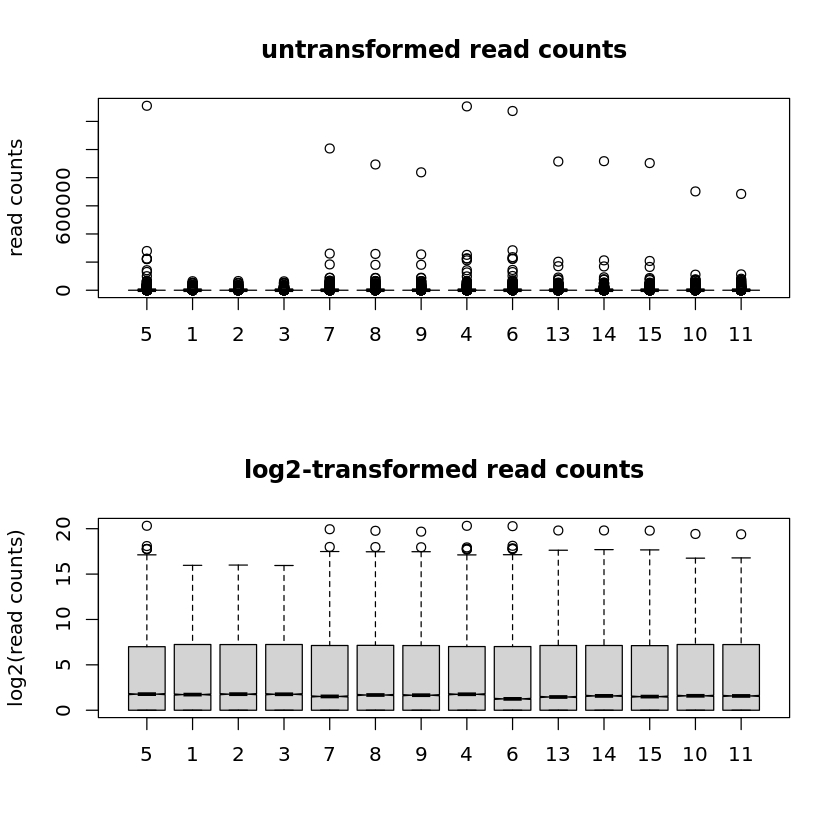

In [44]:
par(mfrow=c(2,1)) # to plot  the  following  two  images  underneath  each  other
# first , boxplots  of non -transformed  read  counts (one  per  sample)
boxplot(counts.sf_normalized , notch = TRUE , main = "untransformed read counts", ylab = "read counts")
# box  plots  of log2 -transformed  read  counts
boxplot(log.norm.counts , notch = TRUE , main = "log2-transformed read counts", ylab = "log2(read counts)")

**Hieralchical clustering and PCA plots**

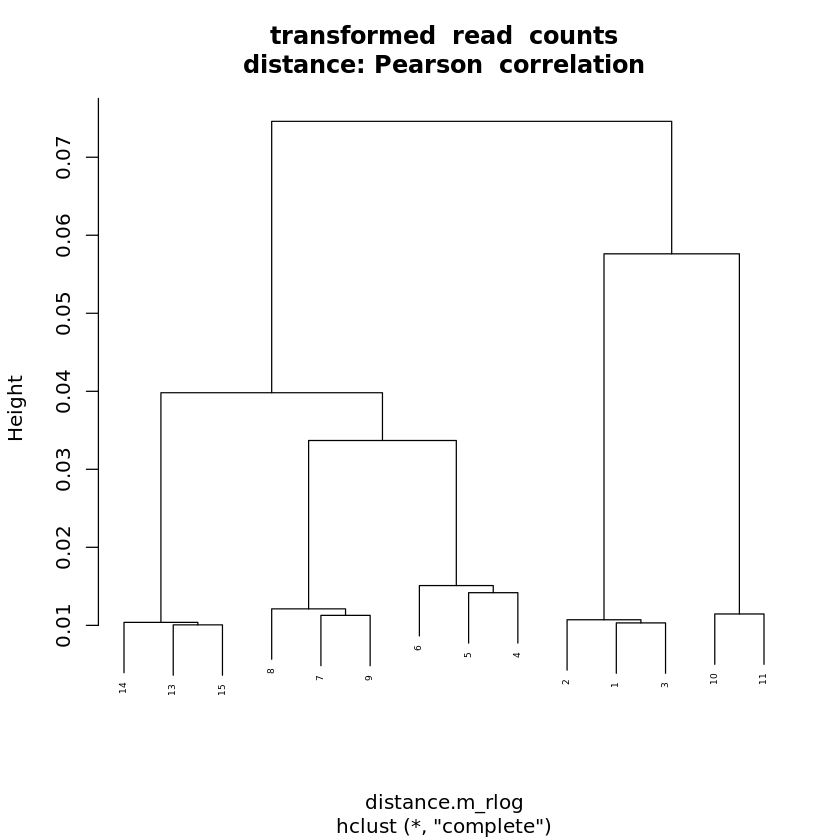

In [45]:
# with log.norm.counts (manuall normalization and log2 transformation)
# cor()  calculates  the  correlation  between  columns  of a matrix
distance.m_rlog  <- as.dist(1 - cor(log.norm.counts , method = "pearson" ))
# plot() can  directly  interpret  the  output  of  hclust ()
plot( hclust(distance.m_rlog),
labels = colnames(log.norm.counts),
main = "transformed  read  counts\ndistance: Pearson  correlation", cex=0.45)

**PCA plots**

In [47]:
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(grid))
suppressPackageStartupMessages(library(gridExtra))

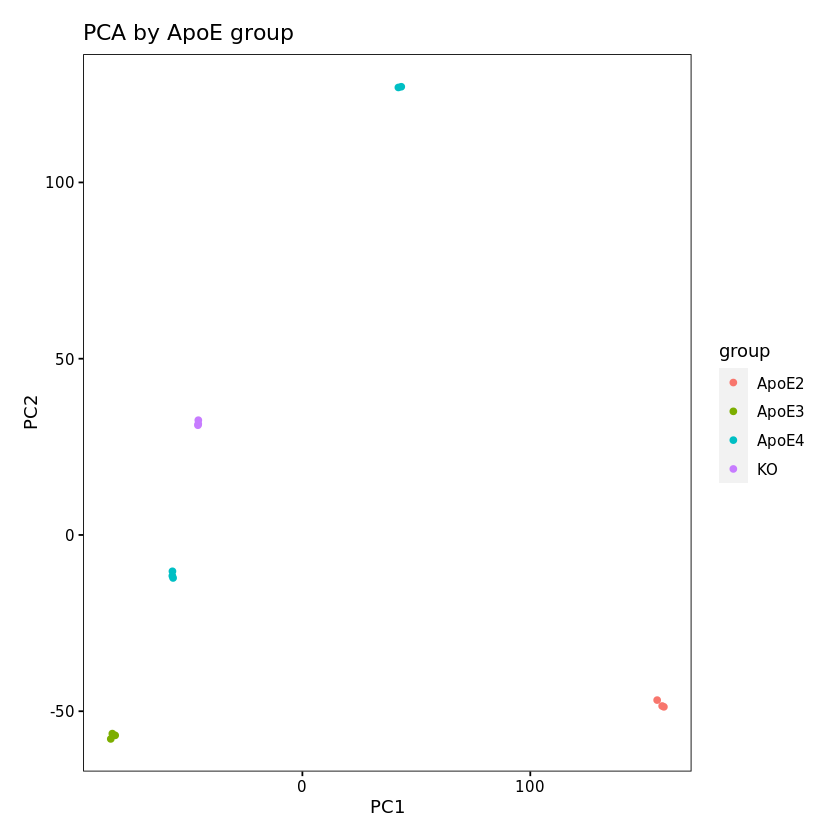

In [48]:
# with log.norm.counts (manuall normalization and log2 transformation)
pca <- prcomp(t(log.norm.counts))
pca2 <- as.data.frame(pca$x)
pca2$group <- as.character(colData(DESeq.ds)$ApoE_group) # if group is a number, the legend in plot is a color gradient

theme<-theme(panel.background = element_blank(),panel.border=element_rect(fill=NA),panel.grid.major = element_blank(),panel.grid.minor = element_blank(),strip.background=element_blank(),axis.text.x=element_text(colour="black"),axis.text.y=element_text(colour="black"),axis.ticks=element_line(colour="black"),plot.margin=unit(c(1,1,1,1),"line"))
p<-ggplot(pca2,aes(x=PC1,y=PC2,color=group))
p<-p+geom_point() +theme + ggtitle("PCA by ApoE group")
plot(p)

**For the next step, Differential Expression Analysis, you need the following:**
- DESeqDataSet object: DESeq.ds

======= Session Info ========

In [51]:
sessionInfo()

R version 4.0.2 (2020-06-22)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 16.04.6 LTS

Matrix products: default
BLAS:   /usr/lib/libblas/libblas.so.3.6.0
LAPACK: /usr/lib/lapack/liblapack.so.3.6.0

locale:
[1] C

attached base packages:
 [1] grid      parallel  stats4    stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] gridExtra_2.3               ggplot2_3.3.2              
 [3] DESeq2_1.28.1               SummarizedExperiment_1.18.2
 [5] DelayedArray_0.14.1         matrixStats_0.57.0         
 [7] Biobase_2.48.0              GenomicRanges_1.40.0       
 [9] GenomeInfoDb_1.24.2         IRanges_2.22.2             
[11] S4Vectors_0.26.1            BiocGenerics_0.34.0        

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.5             locfit_1.5-9.4         lattice_0.20-41       
 [4] digest_0.6.25          IRdisplay_0.7.0        R6_2.4.1              
 [7] repr_1.1.0             RSQLite_2.2.0          ev